<a href="https://colab.research.google.com/github/Manolo1109/Examen1_AnalisisCuantitativo/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
df = pd.read_excel("/content/Examen_AnalisisCuantitativo/data_exam1.xlsx", sheet_name = "data1")
df.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np #Librería para manejar arreglos y vectores
import matplotlib.pyplot as plt #Librería para generación de gráficos
import seaborn as sns
import statsmodels.api as sms
import scipy.stats as stats
import pylab
from statsmodels.stats.diagnostic import het_breuschpagan

#PUNTO 1
Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.

# Punto1.1
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.


In [ ]:
df.describe()

NameError: ignored

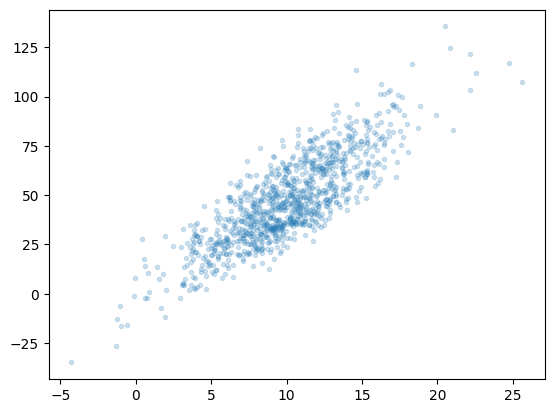

In [ ]:
plt.plot(df["X"], df["Y"], ".", alpha=0.2)

In [ ]:
df.corr()

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


In [ ]:
x = df.drop("Y", axis=1)
X =  sms.add_constant(x)
y = df["Y"]

In [ ]:
model = sms.OLS(y, X) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          2.25e-308
Time:                        17:09:22   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
residuales = result.resid
residuales

0       3.261586
1       3.227152
2       4.535621
3      -7.938790
4      10.902053
         ...    
995    20.154935
996     5.208588
997   -20.049836
998    14.847336
999     2.314925
Length: 1000, dtype: float64

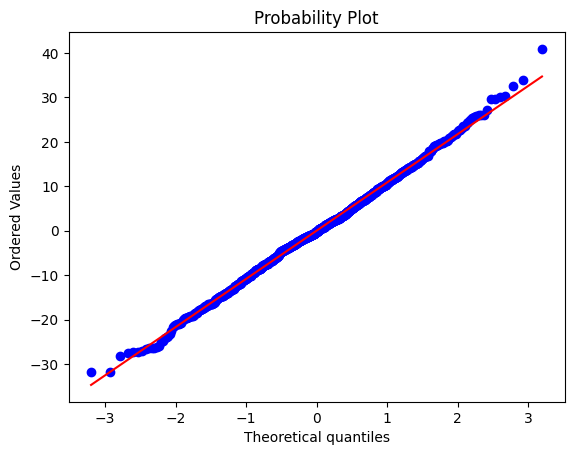

In [ ]:
stats.probplot(residuales, dist="norm", plot=pylab)
pylab.show()

#Punto 1.2
Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

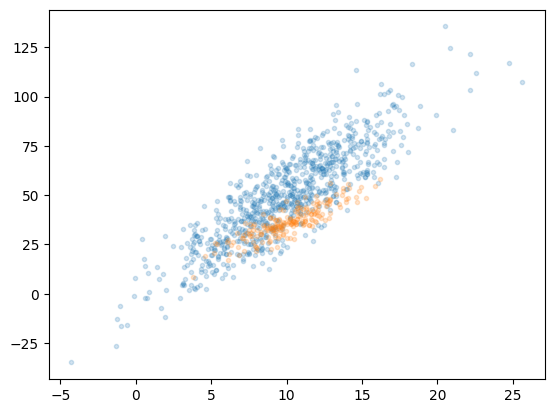

In [ ]:
df_cero = df.query('Ind == 0')
df_uno = df.query('Ind == 1')

plt.plot(df_cero["X"], df_cero["Y"], ".", alpha=0.2)
plt.plot(df_uno["X"], df_uno["Y"], ".", alpha=0.2)

In [ ]:
cov_XY_cero = np.cov(df_cero["X"], df_cero["Y"])[0, 1]
var_X_cero = np.var(df_cero["X"], ddof=1)

beta1_cero = cov_XY_cero/var_X_cero

beta1_cero

5.041128533994832

In [ ]:
cov_XY_uno = np.cov(df_uno["X"], df_uno["Y"])[0, 1]
var_X_uno = np.var(df_uno["X"], ddof=1)

beta1_uno = cov_XY_uno/var_X_uno

beta1_uno

3.1944885147919866

#PUNTO 2

Considere el conjunto de datos “data2” del fichero data_exam1.xlsx

##Punto 2.1

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bivariante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

##Punto 2.2
De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior,  proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo

#PUNTO 3

Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.

#Punto 3.1
Estandarice las variables, calcule las matrices de correlación de Pearson y compárelas ¿Qué diferencia encuentra entre las estructuras de dependencias obtenidas?